In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math


ادرس دهی فایل های هیستوی با فرمت csv

In [17]:
import ipywidgets as widgets
from IPython.display import display

def on_upload_change(change):
    for item in change['new']:
        file_list.append(item)

file_list = []

uploader = widgets.FileUpload(
    accept='.csv',  # محدود کردن به فایل‌های با پسوند .csv
    multiple=True,  # اجازه‌ی انتخاب چند فایل
    description='فایل‌ها را انتخاب کنید'
)

uploader.observe(on_upload_change, names='_counter')
display(uploader)


FileUpload(value={}, accept='.csv', description='فایل\u200cها را انتخاب کنید', multiple=True)

In [89]:
import tkinter as tk
from tkinter import filedialog

def choose_files():
    root = tk.Tk()
    root.withdraw()  # پنجره‌ی اصلی Tkinter را مخفی می‌کند
    file_paths = filedialog.askopenfilenames(title="انتخاب فایل‌ها")  # باز کردن پنجره‌ی انتخاب فایل و ذخیره‌ی مسیر فایل‌ها
    return file_paths

file_list = choose_files()

# برای چاپ مسیر فایل‌های انتخاب شده
for file_path in file_list:
    print(file_path)


In [90]:
file_list = [r'C:\Users\delta2794900\Downloads\1487129.positions (3).csv']

In [84]:
with open(r'C:\Users\delta2794900\Downloads\1487129.positions (3).csv') as fa:
    readere = list(csv.reader(fa,delimiter=';'))
    rea = reversed(readere)
    sa = 0
    next(rea)
    for i in rea:
        if i[-1] == 'Profit':
            continue
        if i[1] == 'Balance':
            print(sa, i[1], i[-1])
        
        if float(i[-1]) < -100 and i[1] != "Balance":
            print(sa,i)
        sa = sa+1

174 Balance -200
233 Balance -100
241 Balance -55
247 Balance -100
263 Balance -323.47
264 Balance 200
270 Balance 215.55
337 Balance -28.32
343 ['2022.06.06 13:39:04', 'Buy', '0.2', 'EURUSD', '1.07263', '0.2', '2022.06.07 15:19:19', '1.06576', '-1.4', '-0.79', '-137.4']
495 ['2023.01.10 15:33:02', 'Sell', '0.25', 'EURUSD', '1.07142', '0.25', '2023.02.03 15:35:36', '1.08582', '-1.76', '38.27', '-360']
496 ['2023.01.10 16:00:22', 'Sell', '0.5', 'EURUSD', '1.07312', '0.5', '2023.02.03 15:35:37', '1.08588', '-3.5', '76.61', '-638']


خواندن فایل ها و مرتب و تمیز کاری فایل ها و تبدیل بازدهی و ضرر ها و کمیستون و سواپ به درصد 

In [85]:
cancelled_order=[]
cancel_order=cancelled_order
margen = []
with open('C:/Users/delta2794900/Documents/analyses.one/test3.csv', 'w', newline='') as f_out:
    writer = csv.writer(f_out)

    b= 0 
    for file_name in file_list:
        b =b+1
        c = 0
        balance = 0
        
        
        bag = 0
        with open(file_name) as f_in:
            reader = list(csv.reader(f_in, delimiter=';'))
            readera = reversed(reader)
            k = 0
            for i in readera:
                bag = bag + 1
                k = k + 1
                #print(b,bag,i)

                if c == 0 :
                    balance = i[-1].replace(' ','')
                    balance = float(balance)
                    margen.append(balance)
                    print(balance)
                    c = c +1
                    continue

                if i[1] == 'Balance':
                    bal = i[-1].replace(' ','')
                    bal = float(bal)
                    balance =float(balance) 
                    balance = bal + balance

                    print(balance)
                    continue
                                      
                    
                if i[1] == 'Type':
                    continue                    
                
                
                if i[-1] == 'cancelled':
                    cancelled_order.append(i)
                    continue


                balance  = float(balance)
                #print(b,balance)

                if len(i) == 11:
                    i.insert(5, 'notsl')
                    i.insert(6, 'nottp')
                    i.append('notcomment ')
                    
                if len(i) == 13:
                    i.insert(7,'0')
                    


                if i[-2] == '[sl]':
                    prof  = str(i[-3])
                    swap  = str(i[-4])
                    com   = str(i[-5])
                    prof  = i[-3].replace(' ','')
                    swap  = i[-4].replace(' ','')
                    com   = i[-5].replace(' ','')
                    prof  = float(prof)
                    if swap == '' :
                        swap = 0
                    swap  = float(swap)
                    if com == '' :
                        com = 0
                    com   = float(com)
                    balance = balance + prof + swap
                    prof  = prof * 100 / balance                    
                    swap  = swap * 100 / balance
                    com   = com * 100 / balance
                    i[-3] = prof
                    i[-4] = swap
                    i[-5] = com
                    writer.writerow(i)
                    margen.append(balance)
                    continue
                    
                if i[-2] == '[tp]':
                    prof  = str(i[-3])
                    swap  = str(i[-4])
                    com   = str(i[-5])                    
                    prof  = i[-3].replace(' ','')
                    swap  = i[-4].replace(' ','')
                    com   = i[-5].replace(' ','')
                    prof  = float(prof)
                    if swap == '' :
                        swap = 0
                    swap  = float(swap)
                    if com == '' :
                        com = 0                    
                    com   = float(com)
                    #print(balance)
                    balance = balance + prof + swap
                    prof  = prof * 100 / balance
                    swap  = swap * 100 / balance
                    com   = com * 100 / balance
                    i[-3] = prof
                    i[-4] = swap
                    i[-5] = com
                    writer.writerow(i)
                    margen.append(balance)
                    continue
                    
                if i[-2] != 'cancelled' :
                    prof  = str(i[-2])
                    swap  = str(i[-3])
                    com   = str(i[-4])                    
                    prof  = i[-2].replace(' ','')
                    swap  = i[-3].replace(' ','')
                    com   = i[-4].replace(' ','')
                    prof  = float(prof)
                    if swap == '' :
                        swap = 0
                    swap  = float(swap)
                    if com == '' :
                        com = 0                    
                    com   = float(com)
                    #print(balance)
                    balance = balance + prof + swap
                    prof  = prof * 100 / balance
                    swap  = swap * 100 / balance
                    com   = com * 100 / balance
                    i[-2] = prof
                    i[-3] = swap
                    i[-4] = com
                    writer.writerow(i)
                    margen.append(balance)
                    continue
                
                
                
                
#print(margen)

203.37
285.97999999999996
443.85000000000014
424.65000000000015
376.14000000000016
103.60000000000014
303.60000000000014
533.7000000000003
1163.4800000000002


نام گذاری ستون ها و خواندن فایل با ماژول pandas

In [58]:


colname = ['Time','Type','Volume','Symbol','Price','S/L','T/P','Volume1','Time1','Price1','Commission','Swap','Profit','Comment']
df = pd.read_csv('C:/Users/delta2794900/Documents/analyses.one/test3.csv', names = colname)



تراکنش سطر ها را به ترتیب تاریخ چیدن 

In [59]:

df['Time'] = pd.to_datetime(df['Time'], format='%Y.%m.%d %H:%M:%S')
df = df.sort_values(by='Time')
df.to_csv("C:/Users/delta2794900/Documents/analyses.one/sorted,test3.csv", index=False, header=None)

سود و ضرر ها به صورت لگاریتمی محاسبه شده (مقدار جمع سود ها به صورت سود مرکب حساب شده و ضرر ها نیز به صورت درصدی از کل سود کم میشوند) 

In [60]:
wintrade = []
losstrade = []
win_p=0
loss_p =0
trade_number =0





# خواندن فایل csv و ذخیره داده ها در لیست data
with open("C:/Users/delta2794900/Documents/analyses.one/sorted,test3.csv") as f:
    reader = csv.reader(f)
    data = []
    for row in reader:
        sod = float(row[-2])
        com = float(row[-4])
        data.append(sod + com)
        trade_number = trade_number+1

# محاسبه سود و زیان مرکب هر معامله و ذخیره آنها در لیست returns
returns = []
cumulative_returns = []
for i, d in enumerate(data):
    if i == 0:
        returns.append(d)
        cumulative_returns.append(d)
    else:
        if cumulative_returns[-1] > 0:
            r = d / 100 * (cumulative_returns[-1] + 100)
            returns.append(r)
            cumulative_returns.append(r + cumulative_returns[-1])
        elif cumulative_returns[-1] < -100:
            print('call margin')
            break
        else:
            r = d / 100 * (100 + cumulative_returns[-1])
            returns.append(r)
            cumulative_returns.append(r + cumulative_returns[-1])


newcsv = pd.read_csv("C:/Users/delta2794900/Documents/analyses.one/sorted,test3.csv")

newcsv['logprofit'] = pd.Series(cumulative_returns)
newcsv['margen'] = pd.Series(margen)

# حذف نام ستون 'logprofit'
column_names = newcsv.columns.tolist()
column_names[-1] = '0'
newcsv.columns = column_names

newcsv.to_csv('newcsv.csv', index=False)



In [61]:
soton = ['dateopen', 'type', 'vol1','symbol', 'priceopen', 'sl', 'tp', 'vol2', 'dateclose', 'priceclose','com','swap','logprof','comment', 'morakab.proft', 'margen' ]

newcsv.columns= soton

In [62]:
newcsv['dateopen'] = pd.to_datetime(newcsv['dateopen'])
newcsv['dateclose'] = pd.to_datetime(newcsv['dateclose'])

In [97]:
newcsv['timetrade']= (newcsv['dateclose']-newcsv['dateopen']).dt.total_seconds()


AttributeError: 'TimedeltaProperties' object has no attribute 'total_minute'

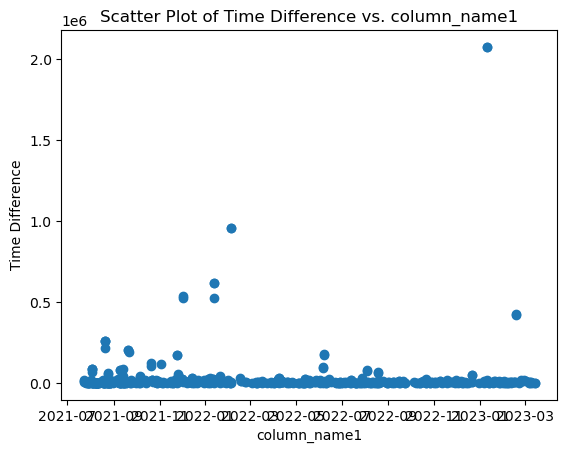

In [96]:
# رسم نمودار scatter

plt.scatter(newcsv['dateopen'], newcsv['timetrade' ])
plt.xlabel('column_name1')
plt.ylabel('Time Difference')
plt.title('Scatter Plot of Time Difference vs. column_name1')
plt.show()

In [ ]:
# رسم نمودار خطی بر اساس ستون time_difference
plt.plot(newcsv['morakab.proft'])
plt.xlabel('timeopen')
plt.ylabel('Time Difference (seconds)')
plt.title('Line Plot of Time Difference')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


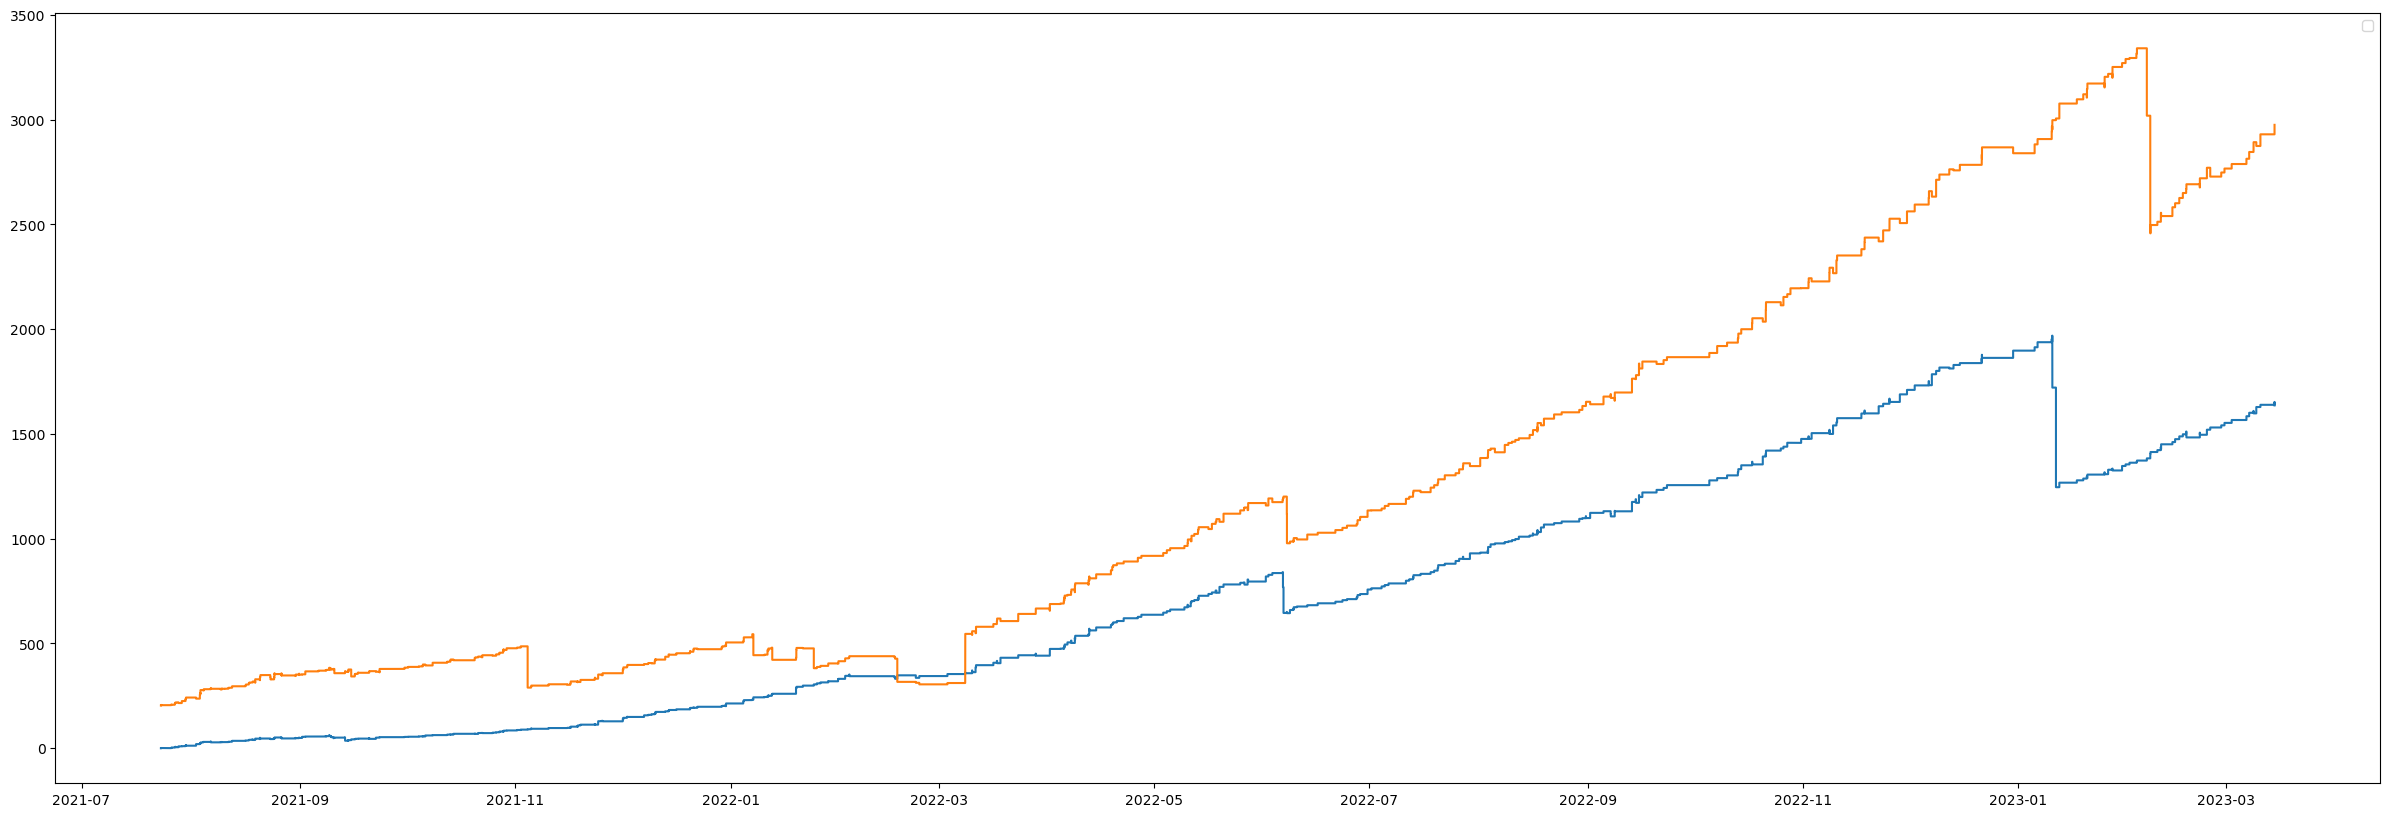

In [64]:
plt.figure(figsize=(30, 10))

plt.step(newcsv['dateopen'], newcsv['morakab.proft'], where='post')

plt.step(newcsv['dateopen'], newcsv['margen'], where='post')



# افزودن اسطوره (legend) برای تشخیص هر نمودار

plt.legend()
# نمایش نمودار
plt.show()

الان میخام فایل قیمت رو خوانده و تغییر بدم

Text(0.5, 1.0, 'نمودار قیمت به ازای زمان')

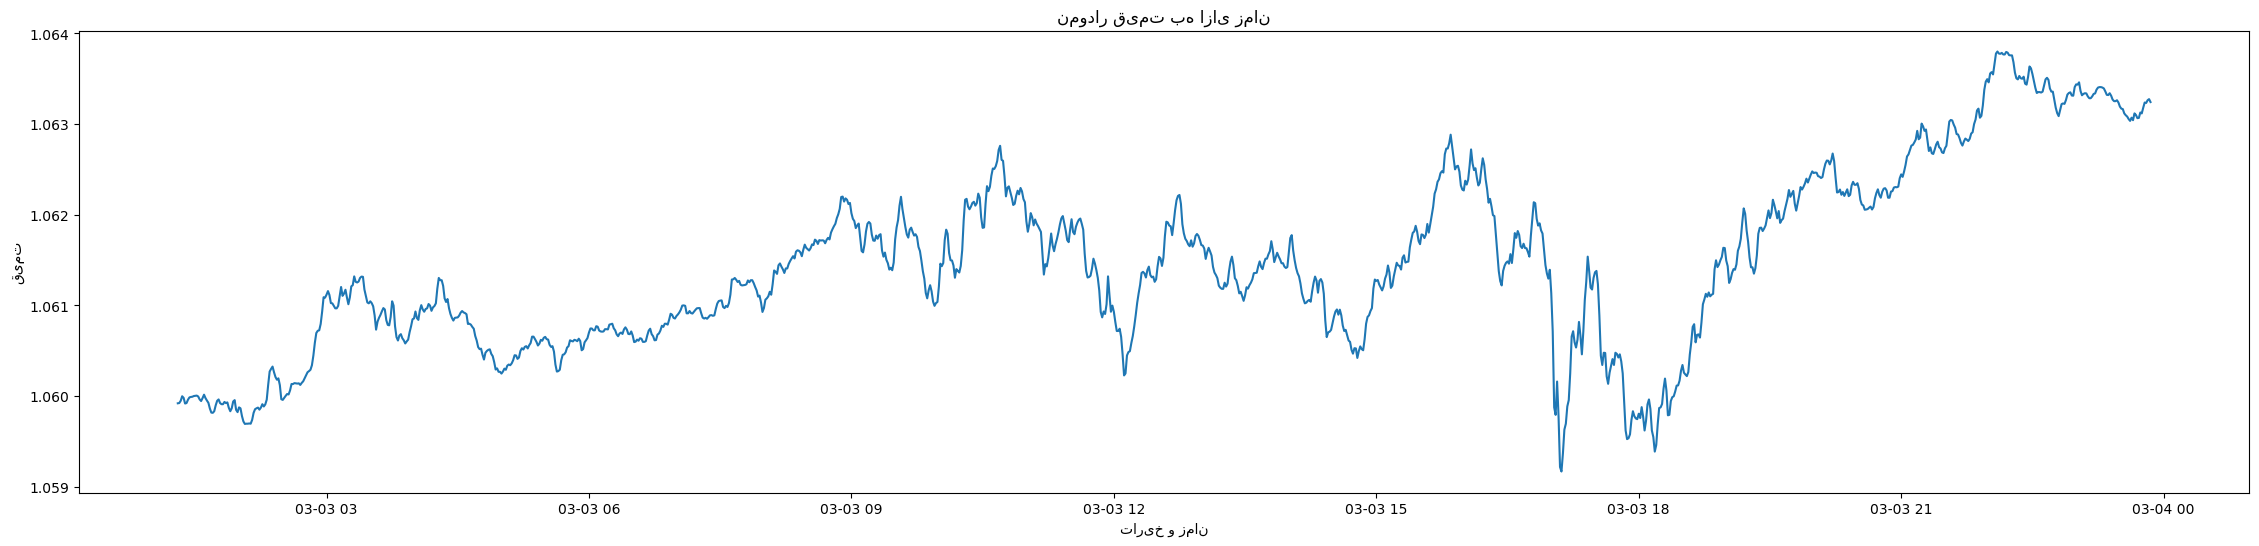

In [86]:
price = pd.read_csv('C:/Users/delta2794900/Documents/p/EURUSD1.csv')
colname = ['date','men', 'openprice', 'highprice','lowprice','closeprice','non']
price.columns= colname
time = price[['date','men']]
price['datetime']=  pd.to_datetime(price['date'] + ' '+price['men'])
price.drop(['date', 'men'], axis= 1, inplace = True) # axis ==1 یعنی انجام عملیات روی ستون ها و axis = 0 یعنی انجام عملیات روی سطر ها
price= price[['openprice', 'highprice', 'lowprice', 'closeprice', 'non', 'datetime']]
price= price.reindex(columns = ['datetime','openprice', 'highprice', 'lowprice', 'closeprice', 'non'])
price['avprice'] = (price['openprice']+price['highprice']+price['lowprice']+price['closeprice']) / 4
price.drop(['openprice', 'highprice', 'lowprice', 'closeprice', 'non'], axis= 1, inplace = True)
price= price.iloc[:-1]

price.to_csv('C:/Users/delta2794900/Documents/p/EURUSD1_result.csv', index=False)


# ساخت نمودار
plt.figure(figsize=(28, 6))
plt.plot(price['datetime'],price['avprice'])
plt.xlabel('تاریخ و زمان')
plt.ylabel('قیمت')
plt.title('نمودار قیمت به ازای زمان')





In [92]:
price

,datetime,avprice
0,2023-03-03 01:18:00,1.059920
1,2023-03-03 01:19:00,1.059923
2,2023-03-03 01:20:00,1.059948
3,2023-03-03 01:21:00,1.059997
4,2023-03-03 01:22:00,1.059980
...,...,...
1349,2023-03-03 23:47:00,1.063238
1350,2023-03-03 23:48:00,1.063232
1351,2023-03-03 23:49:00,1.063262
1352,2023-03-03 23:50:00,1.063275


In [91]:

newcsv

,dateopen,type,vol1,symbol,priceopen,sl,tp,vol2,dateclose,priceclose,com,swap,logprof,comment,morakab.proft,margen,timetrade
0,2021-07-23 12:00:15,Buy,0.04,EURUSD,1.17737,notsl,nottp,0.04,2021-07-23 15:59:15,1.17808,-0.135784,0.0,1.377237,notcomment,-0.535932,203.37,14340.0
1,2021-07-23 14:31:28,Sell,0.02,EURUSD,1.17576,notsl,nottp,0.02,2021-07-23 16:51:10,1.17622,-0.067564,0.0,-0.443994,notcomment,0.698868,206.21,8382.0
2,2021-07-23 15:17:00,Sell,0.04,EURUSD,1.17697,notsl,nottp,0.04,2021-07-23 16:51:04,1.17625,-0.134531,0.0,1.383751,notcomment,0.183734,205.25,5644.0
3,2021-07-26 10:23:43,Buy,0.05,EURUSD,1.17906,notsl,nottp,0.05,2021-07-26 10:24:30,1.17980,-0.170689,0.0,1.754303,notcomment,1.435249,208.13,47.0
4,2021-07-26 12:15:15,Buy,0.05,EURUSD,1.17914,notsl,nottp,0.05,2021-07-26 12:54:25,1.17986,-0.167824,0.0,1.678243,notcomment,3.041591,207.21,2350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,2023-03-08 17:00:18,Buy,0.48,EURUSD,1.05414,notsl,nottp,0.48,2023-03-08 17:05:56,1.05530,-0.114694,0.0,1.900646,notcomment,1597.753499,2892.09,338.0
512,2023-03-09 11:28:55,Buy,0.25,EURUSD,1.05656,notsl,nottp,0.25,2023-03-09 13:06:05,1.05735,-0.059676,0.0,0.669655,notcomment,1628.074562,2873.85,5830.0
513,2023-03-10 15:30:05,Buy,0.25,EURUSD,1.06162,notsl,nottp,0.25,2023-03-10 15:30:25,1.06264,-0.059164,0.0,0.857206,notcomment,1638.615460,2929.53,20.0
514,2023-03-14 15:30:45,Buy,0.25,EURUSD,1.07431,notsl,nottp,0.25,2023-03-14 15:44:46,1.07326,-0.059691,0.0,-0.890274,notcomment,1652.490346,2949.28,841.0


In [ ]:
import pandas as pd

columns = ['Datetime', 'Equity']
df = pd.DataFrame(columns=columns)

for row in newcsv.itertuples():
    start_date = row.dateopen
    end_date = row.dateclose
    filtered_df = price.loc[(price['datetime'] >= start_date) & (price['datetime'] <= end_date)]

    if row.type == 'Buy' :
        b1 = 0
        for i in filtered_df.itertuples():

            if b1 == 0 :
                oneprice =  i.avprice
                b1 = b1 + 1
                continue

            pipeg = i.avprice - oneprice 

            eq = (((row.vol1 * 100000) * pipeg ) *100 / row.margen) + row.morakab.proft
            df = df.append(pd.DataFrame([[i.datetime, eq]], columns=columns), ignore_index=True)

    if row.type == 'Sell':
        b2 = 0
        for i in filtered_df.itertuples():

            if b2 == 0 :
                oneprice =  i.avprice
                
                b2 = b2 + 1
                continue

            pipeg =  oneprice - i.avprice  

            eq = (((row.vol1 * 100000) * pipeg ) *100 / row.margen) + row.morakab.proft
            df = df.append(pd.DataFrame([[i.datetime, eq]], columns=columns), ignore_index=True)

df.to_csv('newfile2.csv', index=False)



In [1]:
import pandas as pd
import numpy as np

# ایجاد رنج تاریخ‌ها با دقت یک ثانیه
datetimes = pd.date_range(start='2020-01-01 00:00:00', end='2023-04-01 00:00:00', freq='S')

# تعداد کل تاریخ‌ها
total_datetimes = len(datetimes)

# مقدار اولیه avprice
initial_avprice = 1.05992

# ایجاد گام‌های تصادفی برای avprice
random_steps = np.random.choice([-0.0001, 0.0001], size=total_datetimes - 1)

# محاسبه مقادیر avprice با استفاده از گام‌های تصادفی
avprices = np.zeros(total_datetimes)
avprices[0] = initial_avprice
for i in range(1, total_datetimes):
    avprices[i] = avprices[i - 1] + random_steps[i - 1]
    
    
# ایجاد dataframe با دو ستون datetime و avprice
data = {'datetime': datetimes, 'avprice': avprices}
df2 = pd.DataFrame(data)

# نمایش چند سطر اول dataframe
print(df2.head())

# اگر می‌خواهید dataframe را به فایل CSV ذخیره کنید:
# df.to_csv("output.csv", index=False)
